In [2]:
import pandas as pd
from scipy.io import savemat
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from data_func import *

<p style="color: brown; font-size: 24px;"><strong><em>1) Data loading</em></strong></p>

In [3]:
# Pandas - openpyxl 
data = load_excel(r'C:\Users\anast\Desktop\Ramd_calc\Data_xlsx\results pbcatom.xlsx')
data2 = load_excel(r'C:\Users\anast\Desktop\Ramd_calc\Data_xlsx\results pbcatom ADDITIONAL.xlsx')

In [4]:
forces_data = {
    'force250': data[:, [0, 1]],
    'force275': data[:, [3, 4]],
    'force300': data[:, [6, 7]],
    'force325': data[:, [9, 10]],
    'force350': data[:, [12, 13]],
    'force375': data[:, [15, 16]],
    'force400': data[:, [18, 19]],
    'force425': data[:, [21, 22]],
    'force450': data[:, [24, 25]],
    'force475': data[:, [27, 28]],
    'force500': data[:, [30, 31]],
    'force525': data[:, [33, 34]],
    'force550': data[:, [36, 37]],
    'force575': data[:, [39, 40]],
    # 'force600': data[:, [42, 43]],
    # 'force588': data[:, [3, 40]],
    # 'force575': data[:, [6, 7]],
    # 'force563': data[:, [9, 10]],
    # 'force538': data[:, [15, 16]],
    # 'force513': data[:, [21, 22]],
    # 'force488': data[:, [27, 28]],
    # 'force475': data[:, [30, 31]],
    # 'force463': data[:, [33, 34]],
    # 'force425': data[:, [39, 40]],
    # 'force375': data[:, [45, 46]],
    # 'force350': data[:, [48, 49]],
    # 'force325': data[:, [51, 52]],
    # 'force300': data[:, [54, 55]],
    # 'force275': data[:, [57, 58]],
    # 'force250': data[:, [60, 61]]
 # второй набор: results pbcatom ADDITIONAL.xlsx :  
    'force488': data2[:, [0, 1]],
    'force513': data2[:, [3, 4]],
    'force538': data2[:, [6, 7]],
    'force563': data2[:, [9, 10]],
    'force588': data2[:, [12, 13]],
    'force263': data2[:, [15, 16]],
    'force288': data2[:, [18, 19]],
    'force313': data2[:, [21, 22]],
    'force338': data2[:, [24, 25]],
    'force363': data2[:, [27, 28]],
    'force388': data2[:, [30, 31]],
    'force413': data2[:, [33, 34]],
    'force438': data2[:, [36, 37]],
    'force463': data2[:, [39, 40]]
}

for key in forces_data:
    forces_data[key] = np.array(forces_data[key], dtype=float)
    
savemat(r'C:\Users\anast\Desktop\RAMD\matscripts\forces_with_pbcatom.mat', forces_data)

In [5]:
# Create empty arrays to store values
tau_all = []       # List of all dissociation times
forces_all = []    # List of forces

<p style="color: brown; font-size: 24px;"><strong><em>2) Procedure of approximation and its interpretation</em></strong><br><span style="font-size: 18px; font-style: italic;">Data loading and initial processing</span></p>

<p style="color: darkblue; font-size: 24px;"><strong><em> force 250 : </em></strong></p>

In [6]:
force = forces_data['force250']
force_value = 250

# Filtering
t, N = filter_data(force)

<span style="color:darkblue;font-size: 18px;"><em>a) Finding classical exponential relaxation:</em></span>

In [7]:
tau_frac = 15500 
N_cut_max = 13

In [8]:
N0 = N[0]
n = np.log(N / N0)
pend_var = []      # For linear fit coefficients
tau_var = []       # To store dissociation time values
lambda_var = []    # Dissociation rate values
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

tau_var: [2.327723210471358, 2.918085047998354, 3.726005080365139, 3.860288824372526, 3.895274370738051, 3.455521269163856, 1.486313322924282, 1.532312945503681, 1.514070033696745, 1.343795448412747, 1.448921520062662, 1.537635853521032, 1.741051527587008]
lambda_var: [-0.429604342776434, -0.342690491727082, -0.268383960416394, -0.259047974256834, -0.256721325591893, -0.289391938901876, -0.672805649102658, -0.652608204436525, -0.660471429817817, -0.744160877446915, -0.690168505438964, -0.650349039215039, -0.574365539534571]
pend_var: [array([-4.29604343e-05,  1.90909976e-01]), array([-3.42690492e-05, -1.03446439e-01]), array([-2.6838396e-05, -3.3425161e-01]), array([-2.59047974e-05, -3.62171839e-01]), array([-2.56721326e-05, -3.68824528e-01]), array([-2.89391939e-05, -2.78622216e-01]), array([-6.72805649e-05,  6.27438633e-01]), array([-6.52608204e-05,  5.87899525e-01]), array([-6.60471430e-05,  6.03129056e-01]), array([-7.44160877e-05,  7.63444061e-01]), array([-6.90168505e-05,  6.6787

In [9]:
N_cut = 6

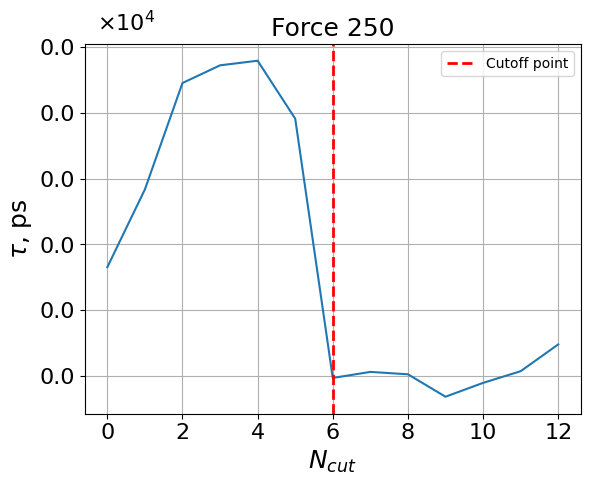

In [10]:
a = np.arange(0, N_cut_max)
plot_tau_with_cutoff(a, tau_var, N_cut, tau_var, force_value)

<span style="color:darkblue;font-size: 18px;"><em>b) Initial non-classical (fractional) relaxation</em></span>

In [11]:
# Define t0 and tend (depending on the data)
t0 = 21  # since Python indexes from zero, we need to subtract 1
tend = 63

In [12]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 1.9563890424232262, pinit: [  1.95638904 -19.4153905 ]
t[t0:tend]: [ 5250.  5500.  5750.  6000.  6250.  6500.  6750.  7000.  7250.  7500.
  7750.  8000.  8250.  8500.  8750.  9000.  9250.  9500.  9750. 10000.
 10250. 10500. 10750. 11000. 11250. 11500. 11750. 12000. 12250. 12500.
 12750. 13000. 13250. 13500. 13750. 14000. 14250. 14500. 14750. 15000.
 15250. 15500.]
n[t0:tend]: [-0.04082199 -0.04082199 -0.04082199 -0.08338161 -0.08338161 -0.17435339
 -0.17435339 -0.17435339 -0.17435339 -0.17435339 -0.17435339 -0.17435339
 -0.17435339 -0.22314355 -0.22314355 -0.22314355 -0.22314355 -0.22314355
 -0.22314355 -0.32850407 -0.32850407 -0.32850407 -0.32850407 -0.32850407
 -0.32850407 -0.32850407 -0.32850407 -0.32850407 -0.38566248 -0.38566248
 -0.38566248 -0.38566248 -0.4462871  -0.4462871  -0.4462871  -0.4462871
 -0.4462871  -0.4462871  -0.4462871  -0.4462871  -0.4462871  -0.4462871 ]


In [13]:
# Values of tau and lambda for N_cut = 6
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 1.486313322924282, lambda: -6.72805649102658e-05


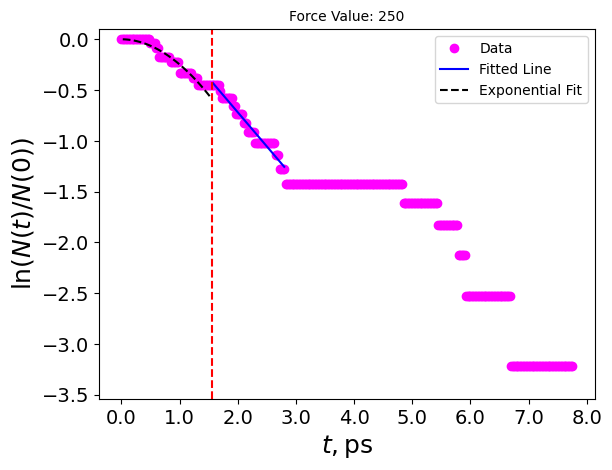

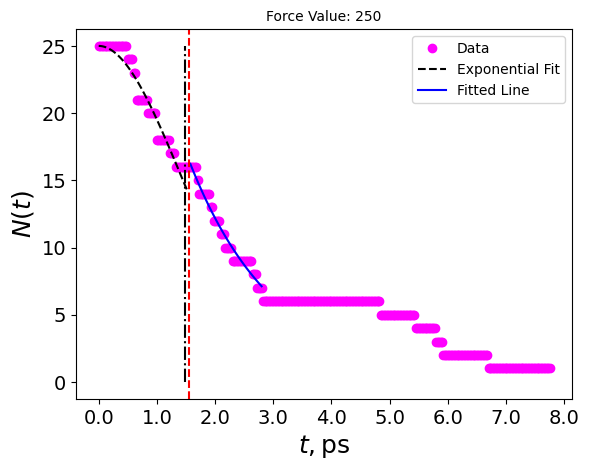

In [14]:
# Filtering data based on both conditions
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

# Calling functions with filtered data
plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)
# красная пунктирная линия - порог tau_frac, который разделяет начальную (дробную) фазу релаксации от классической экспоненциальной релаксации
# черная пунктирно-точечная линия - время диссоциации tau, которое связано со скоростью диссоциации, полученной из аппроксимации 

In [15]:
tau_all.append(tau)
forces_all.append(force_value)

<p style="color: darkblue; font-size: 24px;"><strong><em> force 263 :</em></strong></p>

In [16]:
force = forces_data['force263']
force_value = 263

# Filtering
t, N = filter_data(force)

In [17]:
tau_frac = 18000
N_cut_max = 11

In [18]:
N0 = N[0]
n = np.log(N / N0)
pend_var = []      # For linear fit coefficients
tau_var = []       # To store dissociation time values
lambda_var = []    # Dissociation rate values
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

tau_var: [1.994138309379543, 2.212693655121674, 2.59893485240299, 3.358359213378619, 4.035113289354248, 4.09538067671332, 4.165570785525791, 4.280928421707773, 4.213316412088724, 3.46369752597636, 2.943173559434476]
lambda_var: [-0.501469730206999, -0.451937844032463, -0.384773015404905, -0.297764454742162, -0.247824516510671, -0.2441775451269, -0.240063139360091, -0.233594188337556, -0.237342725348334, -0.288708812620154, -0.339769293181659]
pend_var: [array([-5.01469730e-05,  7.00241327e-01]), array([-4.51937844e-05,  5.23381906e-01]), array([-3.84773015e-05,  3.04995261e-01]), array([-2.97764455e-05,  3.94714634e-02]), array([-2.47824517e-05, -1.07012473e-01]), array([-2.44177545e-05, -1.17558298e-01]), array([-2.40063139e-05, -1.29384650e-01]), array([-2.33594188e-05, -1.46543267e-01]), array([-2.37342725e-05, -1.36506733e-01]), array([-2.88708813e-05, -7.88415874e-03]), array([-3.39769293e-05,  1.13841393e-01])]


In [19]:
N_cut = 4

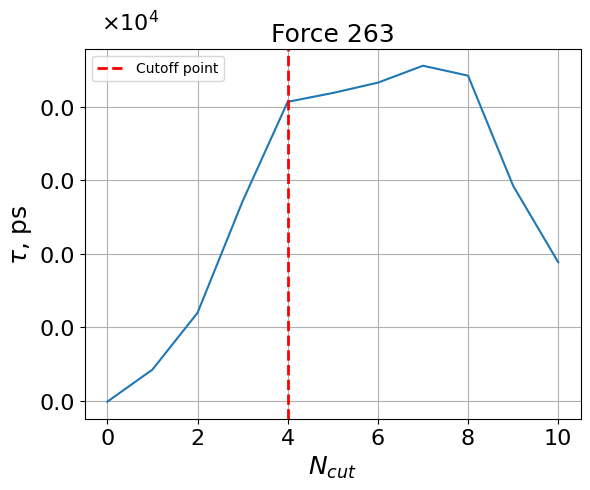

In [20]:
a = np.arange(0, N_cut_max)
plot_tau_with_cutoff(a, tau_var, N_cut, tau_var, force_value)

In [21]:
# Define t0 and tend (depending on the data)
t0 = 19  # since Python indexes from zero, we need to subtract 1
tend = 91

In [22]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 1.3501246328322074, pinit: [  1.35012463 -13.86462908]
t[t0:tend]: [ 4750.  5000.  5250.  5500.  5750.  6000.  6250.  6500.  6750.  7000.
  7250.  7500.  7750.  8000.  8250.  8500.  8750.  9000.  9250.  9500.
  9750. 10000. 10250. 10500. 10750. 11000. 11250. 11500. 11750. 12000.
 12250. 12500. 12750. 13000. 13250. 13500. 13750. 14000. 14250. 14500.
 14750. 15000. 15250. 15500. 15750. 16000. 16250. 16500. 16750. 17000.
 17250. 17500. 17750. 18000. 18250. 18500. 18750. 19000. 19250. 19500.
 19750. 20000. 20250. 20500. 20750. 21000. 21250. 21500. 21750. 22000.
 22250. 22500.]
n[t0:tend]: [-0.08338161 -0.08338161 -0.08338161 -0.08338161 -0.08338161 -0.12783337
 -0.17435339 -0.17435339 -0.17435339 -0.17435339 -0.17435339 -0.17435339
 -0.17435339 -0.17435339 -0.17435339 -0.17435339 -0.17435339 -0.17435339
 -0.17435339 -0.17435339 -0.17435339 -0.17435339 -0.17435339 -0.27443685
 -0.27443685 -0.27443685 -0.32850407 -0.38566248 -0.38566248 -0.38566248
 -0.38566248 -0.38566248 -0.38566248 -0.

In [23]:
# Values of tau and lambda for N_cut = 6
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 4.035113289354248, lambda: -2.4782451651067102e-05


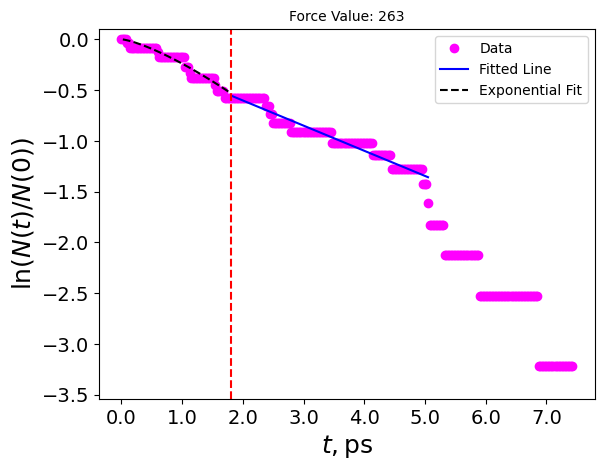

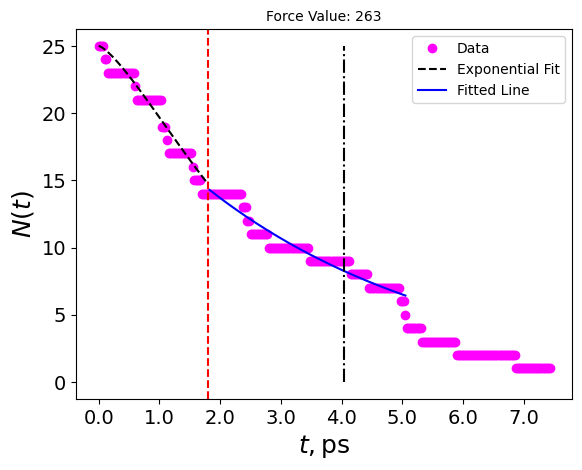

In [24]:
# Filtering data based on both conditions
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

# Calling functions with filtered data
plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)

In [25]:
tau_all.append(tau)
forces_all.append(force_value)

<p style="color: darkblue; font-size: 24px;"><strong><em> force 275 :</em></strong></p>

In [26]:
force = forces_data['force275']
force_value = 275

# Filtering
t, N = filter_data(force)

In [27]:
tau_frac = 0
N_cut_max = 41

In [28]:
N0 = N[0]
n = np.log(N / N0)
pend_var = []      # For linear fit coefficients
tau_var = []       # To store dissociation time values
lambda_var = []    # Dissociation rate values
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

tau_var: [2.820193872615776, 2.820193872615776, 2.60916825561046, 2.34465124005152, 2.35579982901304, 2.452093659800037, 2.503852777104049, 2.53369038559786, 2.643564323810544, 2.643564323810544, 2.654484058923776, 2.694396869313098, 2.699161678781022, 2.699161678781022, 2.63437461806452, 2.623402657637698, 2.673671462179489, 2.683463858632426, 2.729628483900744, 2.75455957189726, 2.759958031975607, 2.759958031975607, 2.699306648519719, 2.636593534215924, 2.643006935100388, 2.645950802221278, 2.705445654431666, 2.928021728583455, 2.928021728583455, 3.180088196148662, 3.180088196148662, 3.357909311152262, 3.357909311152262, 3.396905385350628, 3.406592952164518, 3.374100988602488, 3.299179781547709, 3.137281501497176, 3.12610436597029, 3.196267642985958, 3.351007218991475]
lambda_var: [-0.354585551621131, -0.354585551621131, -0.38326389946287, -0.426502663985978, -0.424484282443874, -0.40781476515116, -0.399384504210586, -0.394681215070418, -0.378277158226496, -0.378277158226496, -0.3767

In [29]:
N_cut = 8

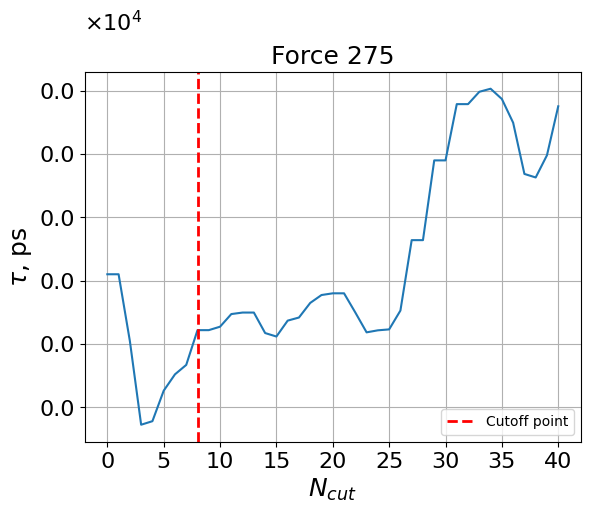

In [30]:
a = np.arange(0, N_cut_max)
plot_tau_with_cutoff(a, tau_var, N_cut, tau_var, force_value)

In [31]:
# Define t0 and tend (depending on the data)
t0 = 19  # since Python indexes from zero, we need to subtract 1
tend = 91

In [32]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 1.0791023874106562, pinit: [  1.07910239 -11.00260765]
t[t0:tend]: [ 7600.  8000.  8400.  8800.  9200.  9600. 10000. 10400. 10800. 11200.
 11600. 12000. 12400. 12800. 13200. 13600. 14000. 14400. 14800. 15200.
 15600. 16000. 16400. 16800. 17200. 17600. 18000. 18400. 18800. 19200.
 19600. 20000. 20400. 20800. 21200. 21600. 22000. 22400. 22800. 23200.
 23600. 24000. 24400. 24800. 25200. 25600. 26000. 26400. 26800. 27200.
 27600. 28000. 28400. 28800. 29200. 29600. 30000. 30400. 30800. 31200.
 31600. 32000. 32400. 32800. 33200. 33600. 34000. 34400. 34800. 35200.
 35600. 36000.]
n[t0:tend]: [-0.27443685 -0.27443685 -0.27443685 -0.30110509 -0.30110509 -0.30110509
 -0.30110509 -0.32850407 -0.32850407 -0.35667494 -0.35667494 -0.38566248
 -0.41551544 -0.4780358  -0.4780358  -0.54472718 -0.54472718 -0.54472718
 -0.61618614 -0.61618614 -0.61618614 -0.61618614 -0.65392647 -0.65392647
 -0.65392647 -0.65392647 -0.65392647 -0.69314718 -0.69314718 -0.73396918
 -0.73396918 -0.73396918 -0.77652879 -0.

In [33]:
# Values of tau and lambda for N_cut = 6
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 2.643564323810544, lambda: -3.78277158226496e-05


In [34]:
# Filtering data based on both conditions
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

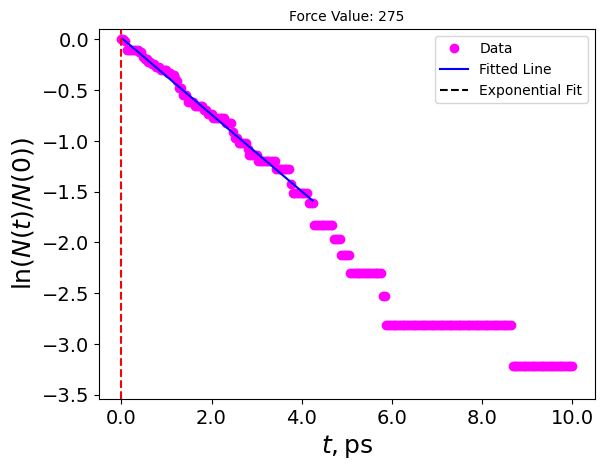

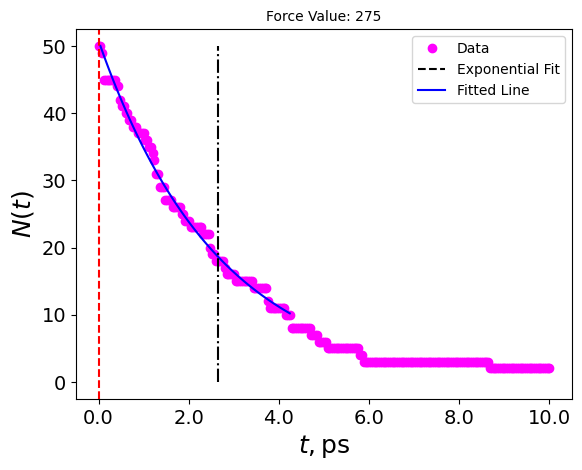

In [35]:
# Calling functions with filtered data
plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)

In [36]:
tau_all.append(tau)
forces_all.append(force_value)

In [37]:
force = forces_data['force288']
force_value = 288

In [38]:
# Filtering
t, N = filter_data(force)

In [39]:
tau_frac = 18000
N_cut_max = 26

In [40]:
N0 = N[0]
n = np.log(N / N0)
pend_var = []      # For linear fit coefficients
tau_var = []       # To store dissociation time values
lambda_var = []    # Dissociation rate values
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

tau_var: [1.756793995758591, 1.850319448972752, 1.95173971160311, 1.963033603648919, 1.91280309490238, 1.791155790721697, 1.704919430218384, 1.7023151629496, 1.614683127181714, 1.63343107651306, 1.697229429699648, 1.736878129480916, 1.969650506957637, 1.969650506957637, 1.992448502863642, 2.01499022219176, 2.022761154506354, 2.088780829971631, 2.127753492362936, 2.138836373353004, 2.138836373353004, 1.849622442575647, 1.921028779476072, 1.936853607873762, 1.889448832138447, 1.788366767435638]
lambda_var: [-0.56921870316855, -0.540447218751969, -0.512363402791362, -0.509415630043818, -0.522792964244464, -0.558298728217872, -0.586537980784177, -0.587435289166608, -0.619316560113817, -0.612208261725211, -0.589195533910207, -0.575745634092854, -0.507704283814605, -0.507704283814605, -0.50189502943878, -0.496280323838134, -0.494373741443559, -0.47874817005745, -0.469979254452765, -0.467543947007187, -0.467543947007187, -0.540650879326201, -0.520554408493939, -0.516301281591322, -0.529254872

In [41]:
N_cut = 4

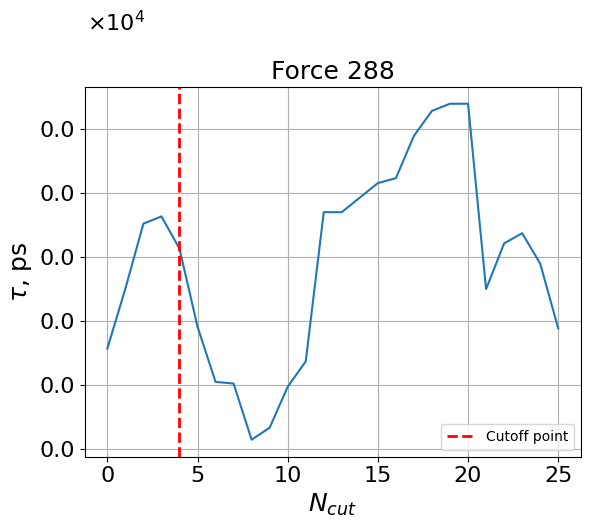

In [42]:
a = np.arange(0, N_cut_max)
plot_tau_with_cutoff(a, tau_var, N_cut, tau_var, force_value)

In [43]:
# Define t0 and tend (depending on the data)
t0 = 19  # since Python indexes from zero, we need to subtract 1
tend = 91

In [44]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 1.1284001694120462, pinit: [  1.12840017 -11.55969396]
t[t0:tend]: [ 4750.  5000.  5250.  5500.  5750.  6000.  6250.  6500.  6750.  7000.
  7250.  7500.  7750.  8000.  8250.  8500.  8750.  9000.  9250.  9500.
  9750. 10000. 10250. 10500. 10750. 11000. 11250. 11500. 11750. 12000.
 12250. 12500. 12750. 13000. 13250. 13500. 13750. 14000. 14250. 14500.
 14750. 15000. 15250. 15500. 15750. 16000. 16250. 16500. 16750. 17000.
 17250. 17500. 17750. 18000. 18250. 18500. 18750. 19000. 19250. 19500.
 19750. 20000. 20250. 20500. 20750. 21000. 21250. 21500. 21750. 22000.
 22250. 22500.]
n[t0:tend]: [-0.14310084 -0.16251893 -0.18232156 -0.18232156 -0.18232156 -0.18232156
 -0.18232156 -0.18232156 -0.20252426 -0.22314355 -0.24419696 -0.24419696
 -0.24419696 -0.24419696 -0.24419696 -0.24419696 -0.26570317 -0.28768207
 -0.28768207 -0.28768207 -0.28768207 -0.28768207 -0.28768207 -0.28768207
 -0.28768207 -0.28768207 -0.28768207 -0.28768207 -0.31015493 -0.35667494
 -0.35667494 -0.3807725  -0.43078292 -0.

In [45]:
# Values of tau and lambda for N_cut = 6
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 1.91280309490238, lambda: -5.22792964244464e-05


In [46]:
# Filtering data based on both conditions
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

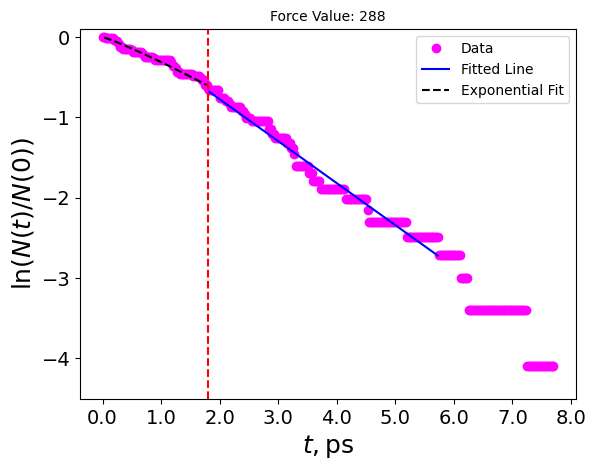

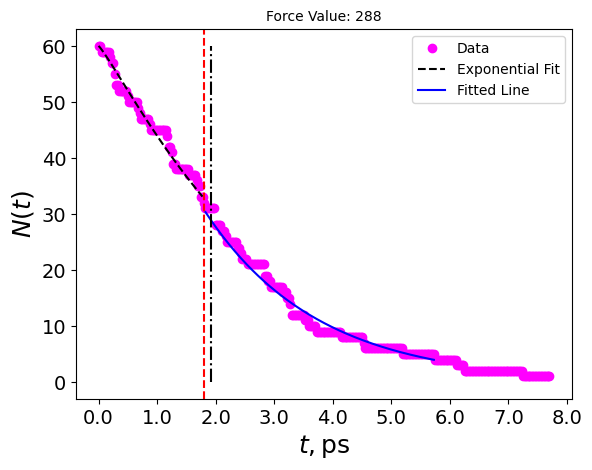

In [47]:
# Calling functions with filtered data
plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)

In [48]:
tau_all.append(tau)
forces_all.append(force_value)

<p style="color: darkblue; font-size: 24px;"><strong><em> force 300 :</em></strong></p>

In [49]:
force = forces_data['force300']
force_value = 300

In [50]:
# Filtering
t, N = filter_data(force)

In [51]:
tau_frac = 0
N_cut_max = 57 #почему в матлабе значение выше????? 

In [52]:
N0 = N[0]
n = np.log(N / N0)
pend_var = []      # For linear fit coefficients
tau_var = []       # To store dissociation time values
lambda_var = []    # Dissociation rate values
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("Количество значений в tau_var:", len(tau_var))
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

Количество значений в tau_var: 57
tau_var: [1.187110632517147, 1.281750004662752, 1.328490318573773, 1.375012751882394, 1.400900545384442, 1.410778211230106, 1.416071777504562, 1.444679009037506, 1.46132159010269, 1.46132159010269, 1.454436962642793, 1.440683413240546, 1.3427052143981, 1.301073268260061, 1.297535101220069, 1.267910738771077, 1.260575985538972, 1.260370536352294, 1.300497519571223, 1.313207749734553, 1.336707999575244, 1.336707999575244, 1.339632503389684, 1.338396765486622, 1.329763215030373, 1.322203351805869, 1.292268467243897, 1.264393112372013, 1.242193341297951, 1.240971483263393, 1.240971483263393, 1.235334897177231, 1.224450695993367, 1.196006376647624, 1.161903954032878, 1.195538017201648, 1.23222140113546, 1.23222140113546, 1.23222140113546, 1.230071862411802, 1.230071862411802, 1.178633363356279, 1.192371805625888, 1.21890676792351, 1.25566441701967, 1.25566441701967, 1.254390239837099, 1.247889700134483, 1.233884818064123, 1.267600042268806, 1.26760004226880

In [53]:
N_cut = 16

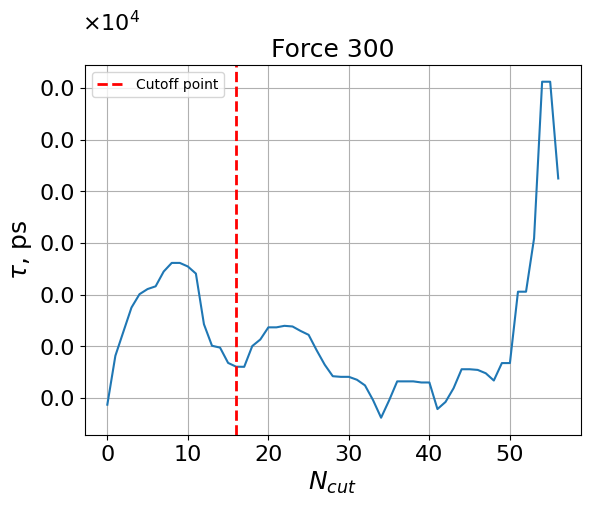

In [54]:
a = np.arange(0, N_cut_max)
plot_tau_with_cutoff(a, tau_var, N_cut, tau_var, force_value)

In [55]:
# Define t0 and tend (depending on the data)
t0 = 2  # since Python indexes from zero, we need to subtract 1
tend = 49

In [56]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 1.0261071124125865, pinit: [ 1.02610711 -9.69933463]
t[t0:tend]: [  500.   750.  1000.  1250.  1500.  1750.  2000.  2250.  2500.  2750.
  3000.  3250.  3500.  3750.  4000.  4250.  4500.  4750.  5000.  5250.
  5500.  5750.  6000.  6250.  6500.  6750.  7000.  7250.  7500.  7750.
  8000.  8250.  8500.  8750.  9000.  9250.  9500.  9750. 10000. 10250.
 10500. 10750. 11000. 11250. 11500. 11750. 12000.]
n[t0:tend]: [-0.05129329 -0.05129329 -0.05129329 -0.06899287 -0.10536052 -0.12405265
 -0.16251893 -0.16251893 -0.20252426 -0.20252426 -0.22314355 -0.24419696
 -0.26570317 -0.31015493 -0.33314445 -0.35667494 -0.35667494 -0.3807725
 -0.3807725  -0.3807725  -0.43078292 -0.51082562 -0.5389965  -0.5389965
 -0.5389965  -0.5389965  -0.56798404 -0.56798404 -0.56798404 -0.597837
 -0.597837   -0.62860866 -0.66035736 -0.72704873 -0.72704873 -0.72704873
 -0.72704873 -0.76214005 -0.76214005 -0.76214005 -0.7985077  -0.7985077
 -0.7985077  -0.83624802 -0.83624802 -0.83624802 -0.87546874]


In [57]:
# Values of tau and lambda for N_cut = 6
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 1.260575985538972, lambda: -7.93288156740857e-05


In [58]:
# Filtering data based on both conditions
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

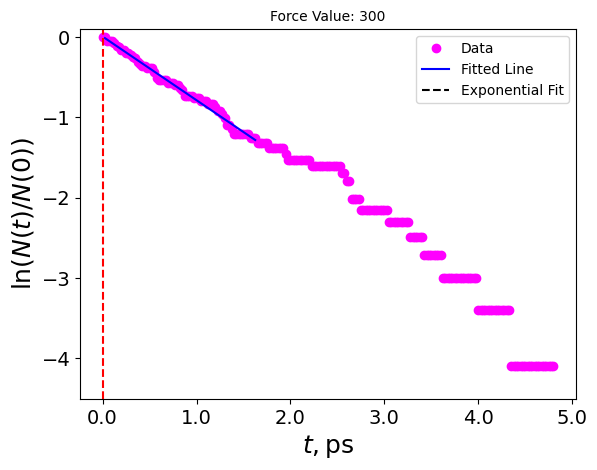

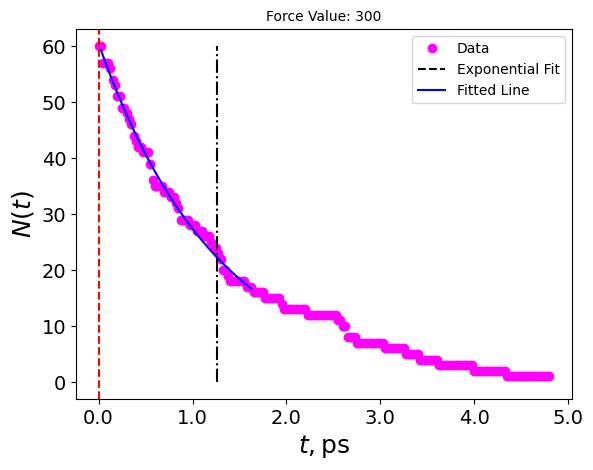

In [59]:
# Calling functions with filtered data
plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)

In [60]:
tau_all.append(tau)
forces_all.append(force_value)

<p style="color: darkblue; font-size: 24px;"><strong><em> force 313 :</em></strong></p>

In [61]:
force = forces_data['force313']
force_value = 313

In [62]:
# Filtering
t, N = filter_data(force)

In [63]:
tau_frac = 2550
N_cut_max = 14 #+1

In [64]:
N0 = N[0]
n = np.log(N / N0)
pend_var = []      # For linear fit coefficients
tau_var = []       # To store dissociation time values
lambda_var = []    # Dissociation rate values
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)
print("pend_var:", pend_var)

tau_var: [1.05662205205017, 1.15393969969257, 1.160885455507552, 1.140786194657328, 1.154425730052014, 1.164644174605124, 1.16635580961869, 1.17664316667049, 1.190041562070832, 1.220242311482064, 1.246598006724979, 1.285041935846092, 1.31997839565879, 1.325394426881698]
lambda_var: [-0.946412199196197, -0.866596409038027, -0.861411429745916, -0.876588448110018, -0.866231559092974, -0.858631350076561, -0.857371302781888, -0.849875330368568, -0.840306785806595, -0.819509363501283, -0.802183217529095, -0.778184720751221, -0.757588156964424, -0.75449238333734]
pend_var: [array([-9.46412199e-05, -5.93939533e-02]), array([-8.66596409e-05, -1.72416508e-01]), array([-8.61411430e-05, -1.79736996e-01]), array([-8.76588448e-05, -1.58908646e-01]), array([-8.66231559e-05, -1.59321483e-01]), array([-8.58631350e-05, -1.67243804e-01]), array([-8.57371303e-05, -1.68547953e-01]), array([-8.49875330e-05, -1.75642743e-01]), array([-8.40306786e-05, -1.84543603e-01]), array([-8.19509364e-05, -2.02829281e-01

In [65]:
N_cut = 4

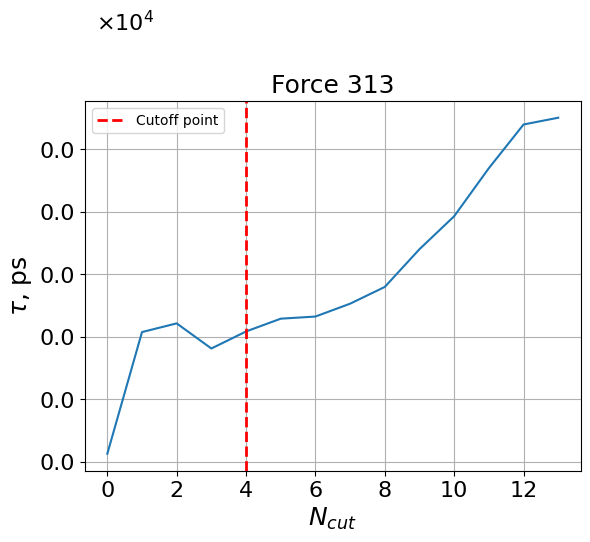

In [66]:
a = np.arange(0, N_cut_max)
plot_tau_with_cutoff(a, tau_var, N_cut, tau_var, force_value)

In [67]:
# Define t0 and tend (depending on the data)
t0 = 19  # since Python indexes from zero, we need to subtract 1
tend = 91

In [68]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 0.7729926909385222, pinit: [ 0.77299269 -7.07487768]
t[t0:tend]: [ 2850.  3000.  3150.  3300.  3450.  3600.  3750.  3900.  4050.  4200.
  4350.  4500.  4650.  4800.  4950.  5100.  5250.  5400.  5550.  5700.
  5850.  6000.  6150.  6300.  6450.  6600.  6750.  6900.  7050.  7200.
  7350.  7500.  7650.  7800.  7950.  8100.  8250.  8400.  8550.  8700.
  8850.  9000.  9150.  9300.  9450.  9600.  9750.  9900. 10050. 10200.
 10350. 10500. 10650. 10800. 10950. 11100. 11250. 11400. 11550. 11700.
 11850. 12000. 12150. 12300. 12450. 12600. 12750. 12900. 13050. 13200.
 13350. 13500.]
n[t0:tend]: [-0.35667494 -0.35667494 -0.39834764 -0.39834764 -0.41985385 -0.46430561
 -0.51082562 -0.51082562 -0.53492318 -0.55961579 -0.55961579 -0.55961579
 -0.55961579 -0.55961579 -0.61090908 -0.61090908 -0.63757733 -0.6649763
 -0.6649763  -0.72213472 -0.72213472 -0.75198768 -0.75198768 -0.75198768
 -0.75198768 -0.75198768 -0.81450804 -0.88119941 -0.88119941 -0.88119941
 -0.88119941 -0.88119941 -0.88119941 -0.881

In [69]:
# Values of tau and lambda for N_cut = 6
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 1.154425730052014, lambda: -8.662315590929741e-05


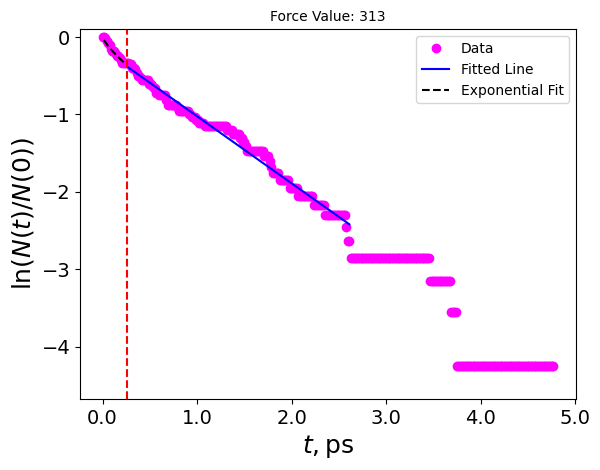

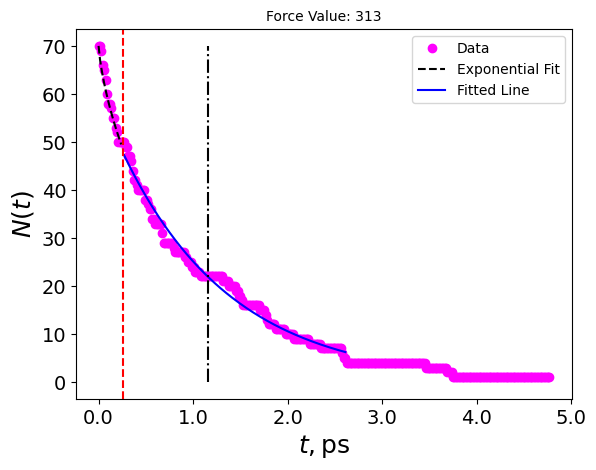

In [70]:
# Filtering data based on both conditions
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

# Calling functions with filtered data
plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)

In [71]:
tau_all.append(tau)
forces_all.append(force_value)

In [72]:
tau_data = pd.DataFrame({
    "Force": forces_all,
    "Dissoc_Time_Tau": tau_all
})

print(tau_data)
tau_data.to_csv("tau_data.csv", index=False)

   Force  Dissoc_Time_Tau
0    250         1.486313
1    263         4.035113
2    275         2.643564
3    288         1.912803
4    300         1.260576
5    313         1.154426
